# Flipkart Reviews Sentiment Analysis Using Python

The dataset used here of Flipkart review sentiment analysis is taken from kaggle

## Importing necessary libraries

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer # For sentiment analysis
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #Stopwords to remove the noise
import seaborn as sns

In [17]:
Flipkart_data = pd.read_csv('C:\\Users\\User\\Downloads\\data.csv')

In [18]:
Flipkart_data.describe()

,rating
count,9976.000000
mean,4.215417
std,1.167911
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [19]:
print(Flipkart_data.head())

                                              review  rating
0  It was nice produt. I like it's design a lot. ...       5
1  awesome sound....very pretty to see this nd th...       5
2  awesome sound quality. pros 7-8 hrs of battery...       4
3  I think it is such a good product not only as ...       5
4  awesome bass sound quality very good bettary l...       5


In [20]:
print(Flipkart_data.tail())

                                                 review  rating
9971                                      GoodREAD MORE       5
9972  Everything is amazimg but the built is very li...       5
9973                                      GoodREAD MORE       5
9974       Best headphone i have ever used....READ MORE       5
9975                                      NiceREAD MORE       5


# Let us have a look towards null values

In [21]:
print(Flipkart_data.isnull().sum())

review    0
rating    0
dtype: int64


## Here we can conclude that the dataset do not have any null values, Now cleaning of the column reviews because we have to do sentiment analysis on that

In [22]:
import nltk
import re  #regular expressions eg: email format 
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('english') # normalisation
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words('english'))



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text


In [24]:
Flipkart_data["review"] = Flipkart_data["review"].apply(clean)

# Flipkart reviews Sentiment analysis 

## The rating column of the data contains the rating given by every reviewer

In [25]:
rating = Flipkart_data['rating'].value_counts()
numbers = rating.index
quantity = rating.values

In [1]:
import plotly.express as px
figure = px.pie(Flipkart_data, values=quantity, names=numbers, hole=0.35)
figure.show()

NameError: name 'Flipkart_data' is not defined

## So around 57% of the reviwer have given feedback 5 out of 5 rating. Now, let us go towards the review

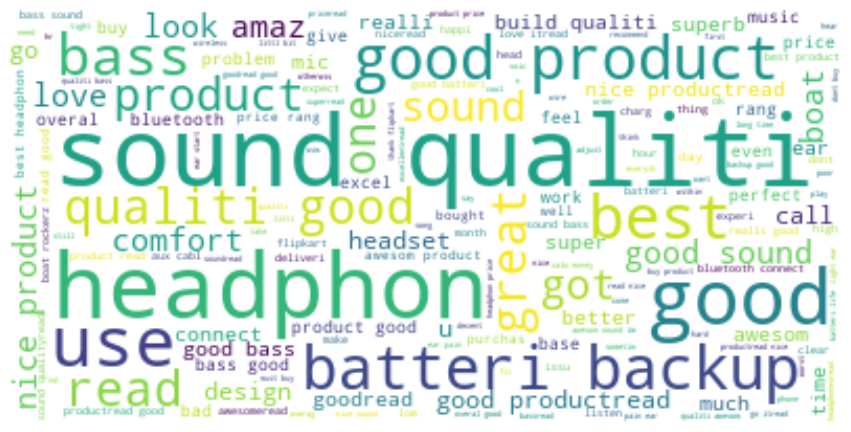

In [33]:
text = " ".join(i for i in Flipkart_data.review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color = "white").generate(text)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

# We are dividing the sentiment in 3 parts. Positive, negative , neutral

In [41]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
Flipkart_data['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in Flipkart_data['review']]
Flipkart_data['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in Flipkart_data['review']]
Flipkart_data['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in Flipkart_data['review']]
Flipkart_data = Flipkart_data[['review','Positive','Negative','Neutral']]
print(Flipkart_data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-41-a2388f23e07a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-41-a2388f23e07a>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



                                              review  Positive  Negative  \
0  nice produt like design lot  easi carri   look...     0.431     0.000   
1  awesom soundveri pretti see nd sound qualiti g...     0.471     0.000   
2  awesom sound qualiti pros  hrs batteri life in...     0.194     0.000   
3  think good product per qualiti also design qui...     0.393     0.049   
4  awesom bass sound qualiti good bettari long li...     0.260     0.000   

   Neutral  
0    0.569  
1    0.529  
2    0.806  
3    0.558  
4    0.740  


<ipython-input-41-a2388f23e07a>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
# Now let us see the reviewers thought

In [51]:
X = sum(Flipkart_data["Positive"])
Y = sum(Flipkart_data["Negative"])
Z = sum(Flipkart_data["Neutral"])

In [52]:
def sentiment_score(p,q,r):
    if (p>q) and (p>r):
        print('Positive')
    elif (q>p) and (q>r):
        print('Negative')
    else:
        print('Neutral')

In [53]:
sentiment_score(X,Y,Z)

Neutral


 # Let's go through total reviews

In [56]:
print('Positive review: ', X)
print('Negative review: ', Y)
print('Neutral review: ', Z)

Positive review:  3127.3110000000815
Negative review:  374.17000000000013
Neutral review:  6474.495999999996


# Conclusion

## Here we can see that the most of the data is in the Neutral. From this data we can say that the people are satisfied with Flipkart product and services 